<a href="https://colab.research.google.com/github/ShivamSinghal1/My-ML-Projects/blob/master/Codeforces_Problem_Predicter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Outlier detection
from sklearn.svm import OneClassSVM

# SVM Algo
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/codeforces_problem_stat_complete.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7979 entries, 0 to 7978
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   code    7979 non-null   object
 1   dacu    7979 non-null   int64 
 2   dwau    7979 non-null   int64 
 3   wa      7979 non-null   int64 
 4   rating  7979 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 311.8+ KB


In [4]:
df.head()

,code,dacu,dwau,wa,rating
0,1A,120239,19861,456524,1000
1,1C,3695,1445,17887,2100
2,1B,13500,4258,65477,1600
3,2B,5542,2673,49509,2000
4,2A,12455,6046,74079,1500


In [5]:
test_df = df[df['rating'] == 0]

In [6]:
df = df[df['rating'] > 0]

In [7]:
rating , freq = np.unique(df['rating'] , return_counts = True)

<BarContainer object of 28 artists>

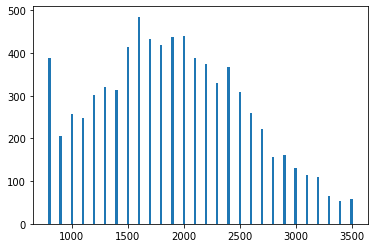

In [8]:
plt.bar(rating , freq , 20)

In [9]:
rating , freq

(array([ 800,  900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800,
        1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900,
        3000, 3100, 3200, 3300, 3400, 3500]),
 array([388, 205, 257, 248, 301, 321, 314, 414, 485, 432, 419, 438, 440,
        388, 374, 330, 367, 308, 259, 222, 157, 162, 130, 114, 109,  64,
         53,  58]))

In [10]:
#rating         #category
#800  - 1100 - 0 (Very Easy)
#1200 - 1500 - 1 (Easy)
#1600 - 1800 - 2 (Medium)
#1900 - 2100 - 3 (Hard)
#2200 - 2600 - 4 (Super Hard)
#2700 -      - 5 (Extreme Hard) 

In [11]:
df['category'] = df['rating'].replace(rating , [ 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2,
        3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

<BarContainer object of 6 artists>

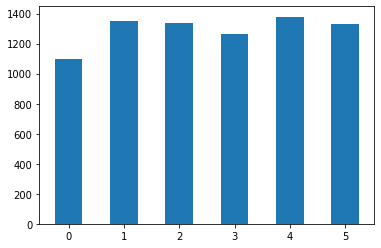

In [12]:
category , category_freq = np.unique(df['category'] , return_counts = True)
plt.bar(category , category_freq , 0.5)

In [13]:
category_freq

array([1098, 1350, 1336, 1266, 1379, 1328])

In [14]:
df.head()

,code,dacu,dwau,wa,rating,category
0,1A,120239,19861,456524,1000,0
1,1C,3695,1445,17887,2100,3
2,1B,13500,4258,65477,1600,2
3,2B,5542,2673,49509,2000,3
4,2A,12455,6046,74079,1500,1


In [15]:
X = np.array(df[['dacu','dwau','wa']])
y = np.array(df['category'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
X_train.shape , y_train.shape

((6205, 3), (6205,))

In [39]:
ee = OneClassSVM(nu=0.01)
yhat = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(6148, 3) (6148,)


In [40]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(6042, 3) (6042,)


In [18]:
from sklearn.ensemble import IsolationForest
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(5584, 3) (5584,)


SVM

In [19]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit(X_train).transform(X_train)
print(X_train)

[[-0.73818209 -0.69856221 -0.77088466]
 [-0.46713799 -0.36251393 -0.59001572]
 [ 0.84725433  2.62184147  1.82363133]
 ...
 [ 1.98152241  0.88610584  1.62343878]
 [ 2.09131242 -0.24844249 -0.28676395]
 [-0.32441097 -0.49508344 -0.54080494]]


In [20]:
param_grid = {'C': [i for i in range(1,1000)], #1 ,10 ,100,1000,10000
          
              'gamma': [0.000001,0.00001,.00005,.0001,.0005,.001,.005,0.01, .1 ],
              
              'kernel':['linear','rbf'],

              'decision_function_shape':['ovr','ovo','dag']
              
              }

clf=RandomizedSearchCV(SVC(), param_grid, n_iter=100, cv=5, verbose=10)
clf = clf.fit(X_train, y_train)
clf.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] kernel=linear, gamma=1e-05, decision_function_shape=ovr, C=922 ..


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  kernel=linear, gamma=1e-05, decision_function_shape=ovr, C=922, score=0.457, total=  10.8s
[CV] kernel=linear, gamma=1e-05, decision_function_shape=ovr, C=922 ..


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.8s remaining:    0.0s


[CV]  kernel=linear, gamma=1e-05, decision_function_shape=ovr, C=922, score=0.496, total=  10.7s
[CV] kernel=linear, gamma=1e-05, decision_function_shape=ovr, C=922 ..


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.5s remaining:    0.0s


[CV]  kernel=linear, gamma=1e-05, decision_function_shape=ovr, C=922, score=0.473, total=  11.6s
[CV] kernel=linear, gamma=1e-05, decision_function_shape=ovr, C=922 ..


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   33.1s remaining:    0.0s


[CV]  kernel=linear, gamma=1e-05, decision_function_shape=ovr, C=922, score=0.467, total=  10.3s
[CV] kernel=linear, gamma=1e-05, decision_function_shape=ovr, C=922 ..


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   43.3s remaining:    0.0s


[CV]  kernel=linear, gamma=1e-05, decision_function_shape=ovr, C=922, score=0.453, total=   9.7s
[CV] kernel=rbf, gamma=5e-05, decision_function_shape=dag, C=680 .....


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   53.0s remaining:    0.0s


[CV]  kernel=rbf, gamma=5e-05, decision_function_shape=dag, C=680, score=0.432, total=   0.9s
[CV] kernel=rbf, gamma=5e-05, decision_function_shape=dag, C=680 .....


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   53.9s remaining:    0.0s


[CV]  kernel=rbf, gamma=5e-05, decision_function_shape=dag, C=680, score=0.479, total=   0.9s
[CV] kernel=rbf, gamma=5e-05, decision_function_shape=dag, C=680 .....


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   54.8s remaining:    0.0s


[CV]  kernel=rbf, gamma=5e-05, decision_function_shape=dag, C=680, score=0.437, total=   0.9s
[CV] kernel=rbf, gamma=5e-05, decision_function_shape=dag, C=680 .....


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   55.6s remaining:    0.0s


[CV]  kernel=rbf, gamma=5e-05, decision_function_shape=dag, C=680, score=0.431, total=   0.9s
[CV] kernel=rbf, gamma=5e-05, decision_function_shape=dag, C=680 .....


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   56.5s remaining:    0.0s


[CV]  kernel=rbf, gamma=5e-05, decision_function_shape=dag, C=680, score=0.427, total=   0.9s
[CV] kernel=linear, gamma=0.0005, decision_function_shape=ovr, C=533 .
[CV]  kernel=linear, gamma=0.0005, decision_function_shape=ovr, C=533, score=0.457, total=   6.8s
[CV] kernel=linear, gamma=0.0005, decision_function_shape=ovr, C=533 .
[CV]  kernel=linear, gamma=0.0005, decision_function_shape=ovr, C=533, score=0.496, total=   6.8s
[CV] kernel=linear, gamma=0.0005, decision_function_shape=ovr, C=533 .
[CV]  kernel=linear, gamma=0.0005, decision_function_shape=ovr, C=533, score=0.473, total=   7.2s
[CV] kernel=linear, gamma=0.0005, decision_function_shape=ovr, C=533 .
[CV]  kernel=linear, gamma=0.0005, decision_function_shape=ovr, C=533, score=0.468, total=   6.7s
[CV] kernel=linear, gamma=0.0005, decision_function_shape=ovr, C=533 .
[CV]  kernel=linear, gamma=0.0005, decision_function_shape=ovr, C=533, score=0.452, total=   6.4s
[CV] kernel=linear, gamma=5e-05, decision_function_shape=ovr,

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 27.5min finished


SVC(C=435, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='dag', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
from sklearn.preprocessing import StandardScaler
X_test = StandardScaler().fit(X_test).transform(X_test)

y_pred_svm = clf.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred_svm).sum()))
print("Accuracy = %f" % (( (y_test == y_pred_svm).sum())/X_test.shape[0]))
confusion_matrix(y_test, y_pred_svm)

Number of mislabeled points out of a total 1552 points : 1023
Accuracy = 0.340851


array([[ 77,  97,  30,   0,   8,   0],
       [  6,  87, 164,   8,  33,   0],
       [  0,  17, 150,  19,  78,   0],
       [  0,   0,  87,  32, 155,   0],
       [  0,   0,  29,  10, 183,   0],
       [  0,   0,   1,   0, 281,   0]])

Naive Bayes

In [42]:
gnb = GaussianNB()
y_pred_nb = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred_nb).sum()))
print("Accuracy = %f" % (( (y_test == y_pred_nb).sum())/X_test.shape[0]))
confusion_matrix(y_test, y_pred_nb)

Number of mislabeled points out of a total 1552 points : 863
Accuracy = 0.443943


array([[139,  40,  15,   7,   4,   7],
       [ 44, 128,  34,  50,  28,  14],
       [  1,  86,  44,  39,  53,  41],
       [  0,  25,  31,  50,  95,  73],
       [  0,   0,  15,  21,  71, 115],
       [  0,   1,   2,   2,  20, 257]])

In [43]:
clf = RandomForestClassifier(max_depth=8, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy = %f" % (( (y_test == y_pred).sum())/X_test.shape[0]))
confusion_matrix(y_test, y_pred)

Number of mislabeled points out of a total 1552 points : 778
Accuracy = 0.498711


array([[142,  54,   7,   3,   4,   2],
       [ 53, 140,  66,  23,   9,   7],
       [  9,  57, 114,  30,  38,  16],
       [  0,  10,  74,  61,  98,  31],
       [  0,   1,  26,  24, 107,  64],
       [  0,   1,   1,   0,  70, 210]])

In [24]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy = %f" % (( (y_test == y_pred).sum())/X_test.shape[0]))
confusion_matrix(y_test, y_pred)

Number of mislabeled points out of a total 1552 points : 1049
Accuracy = 0.324098


array([[ 99,  89,   6,  11,   7,   0],
       [ 71, 112,  43,  44,  28,   0],
       [ 13,  55,  65,  76,  55,   0],
       [  3,  20,  58,  72, 119,   2],
       [  0,   3,  33,  33, 153,   0],
       [  0,   0,   3,   5, 272,   2]])